## Select the data

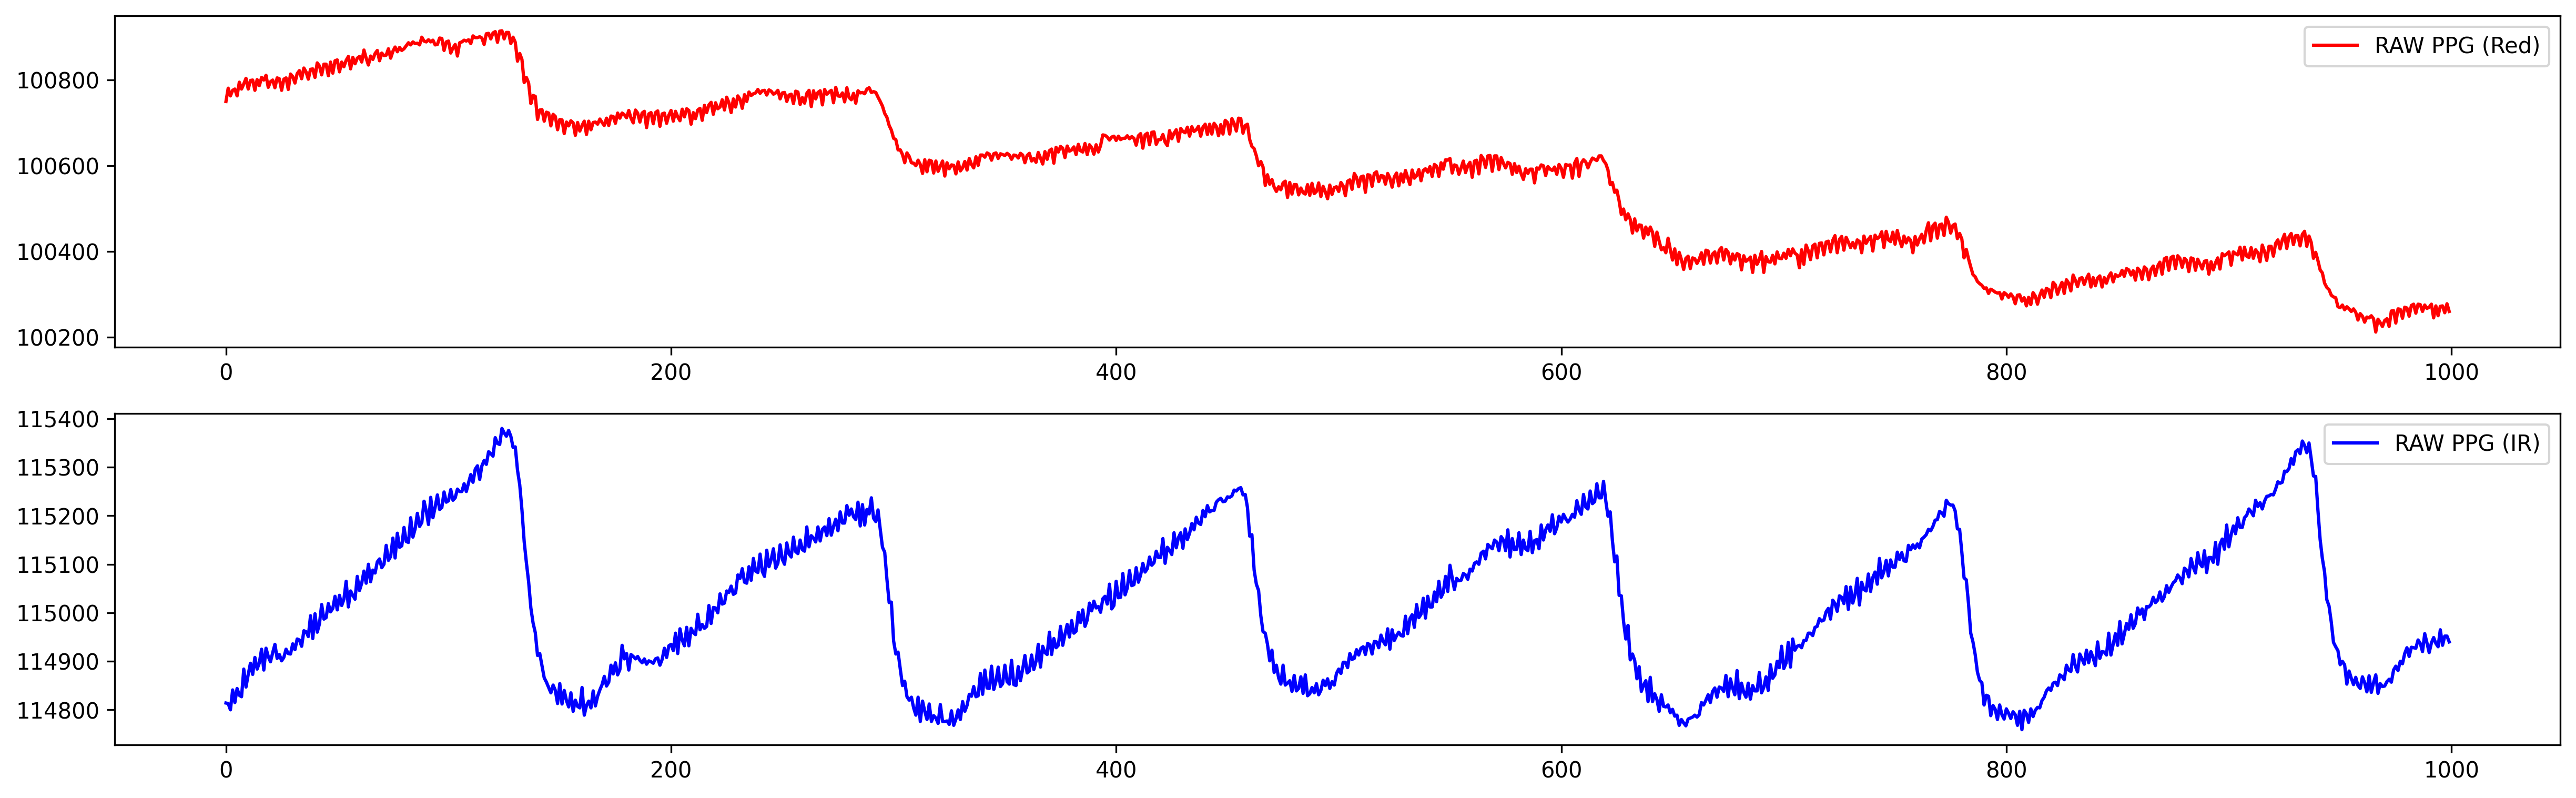

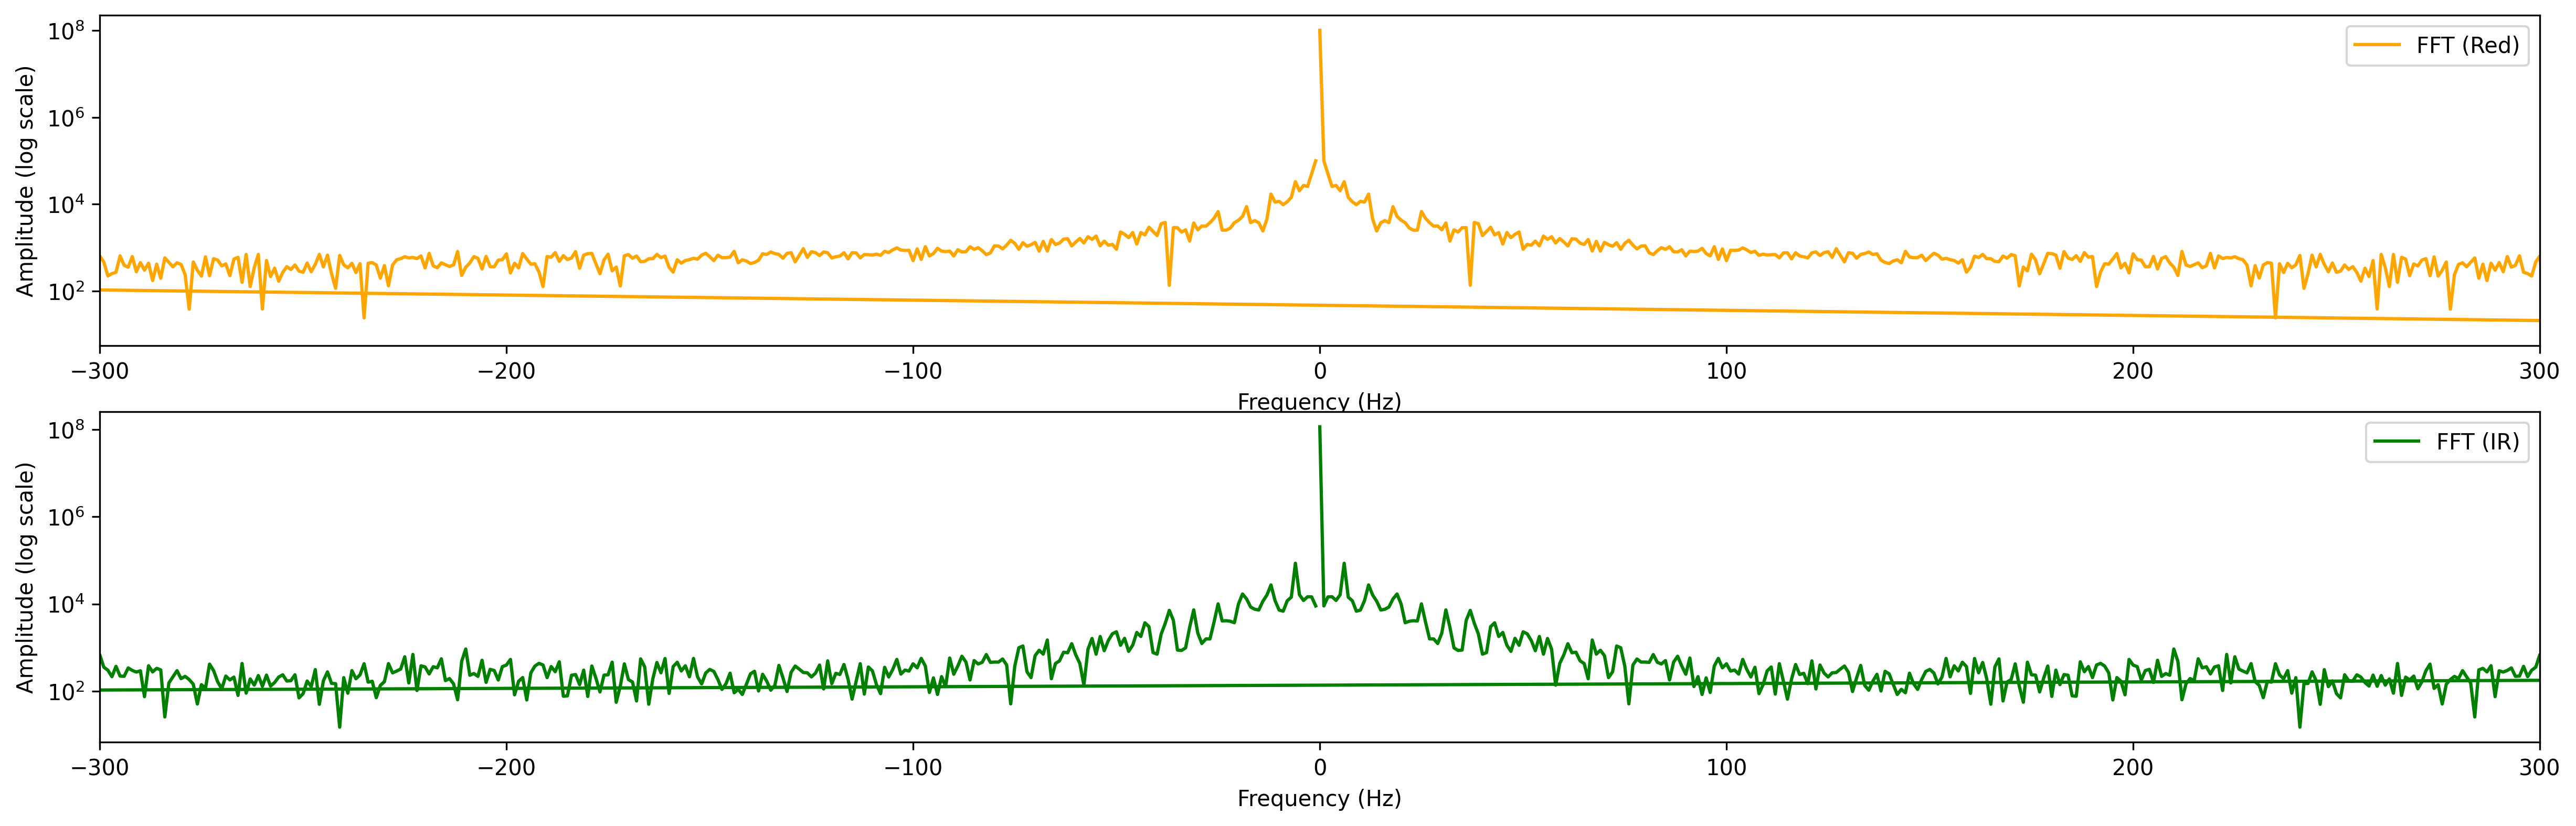

In [2]:
# open file
import os

dir_name = %pwd

# import libs
import matplotlib
import os.path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.gridspec as gridspec

# open file 
from tkinter import filedialog
from tkinter import *

root = Tk()
fname1 = filedialog.askopenfilename(initialdir = dir_name,title = "Select file")
fname1_blank1 = os.path.basename(fname1)
fname1_blank1 = str(fname1).replace(".csv", "")
root.destroy() # get rid of the top-level instance once to make it actually invisible

# Load data
data_array = np.genfromtxt(fname1, delimiter=',', skip_footer=0, skip_header=0)
data = [data_array[:, 0], data_array[:, 1]]

# Create figure for raw images
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# First subplot for RAW PPG (Red)
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(data[1], color='red', label="RAW PPG (Red)")
plt.legend()

# Second subplot for RAW PPG (IR)
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(data[0], color='blue', label="RAW PPG (IR)")
plt.legend()

plt.show()

# Compute FFT for both signals
fft_red = np.fft.fft(data[1])
fft_ir = np.fft.fft(data[0])

# Compute the corresponding frequencies
N = len(data[0])  # Assuming both signals have the same length
frequencies = np.fft.fftfreq(N, d = 1/N)


# Create figure to show fft
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

raw_fft_x_limit = 300

# Third subplot for FFT of Red signal
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_red), color='orange', label="FFT (Red)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.yscale('log')
plt.legend()

# Fourth subplot for FFT of IR signal
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_ir), color='green', label="FFT (IR)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.yscale('log')
plt.legend()

plt.show()


## Smooth the raw data

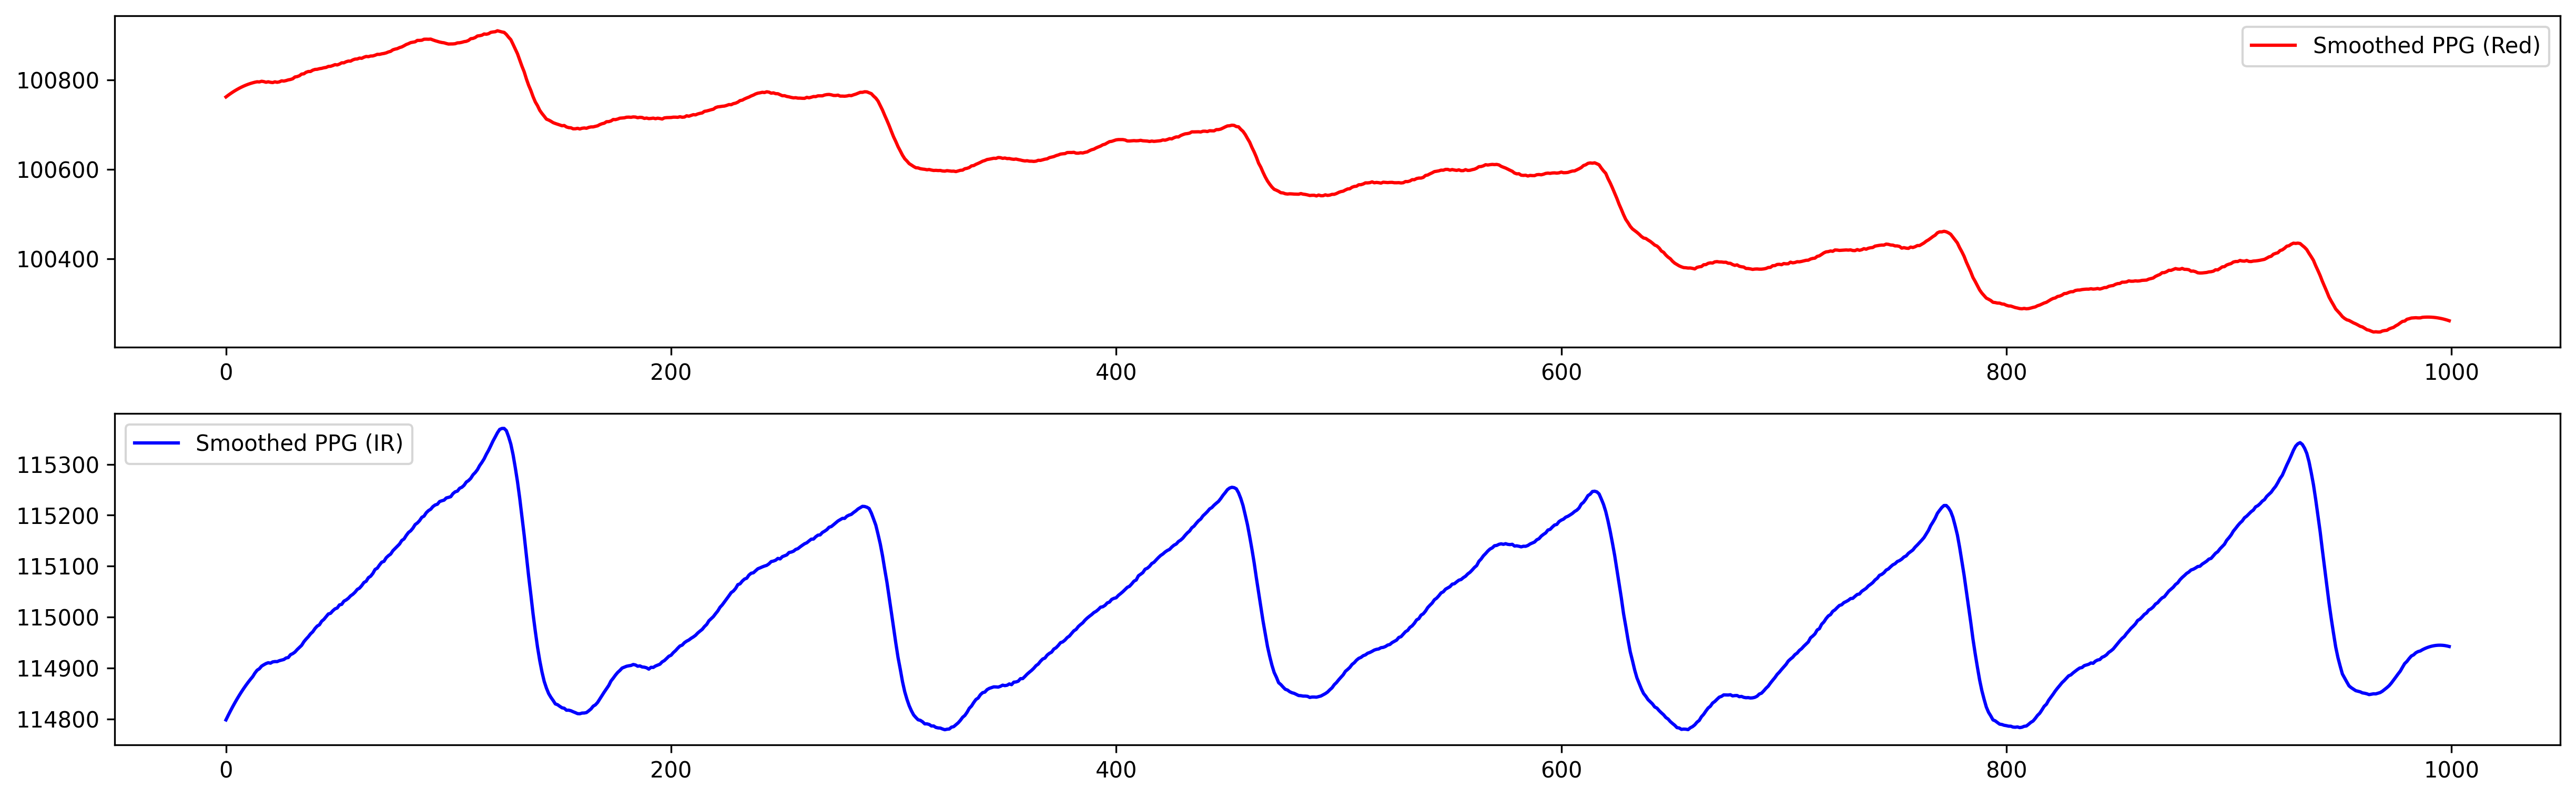

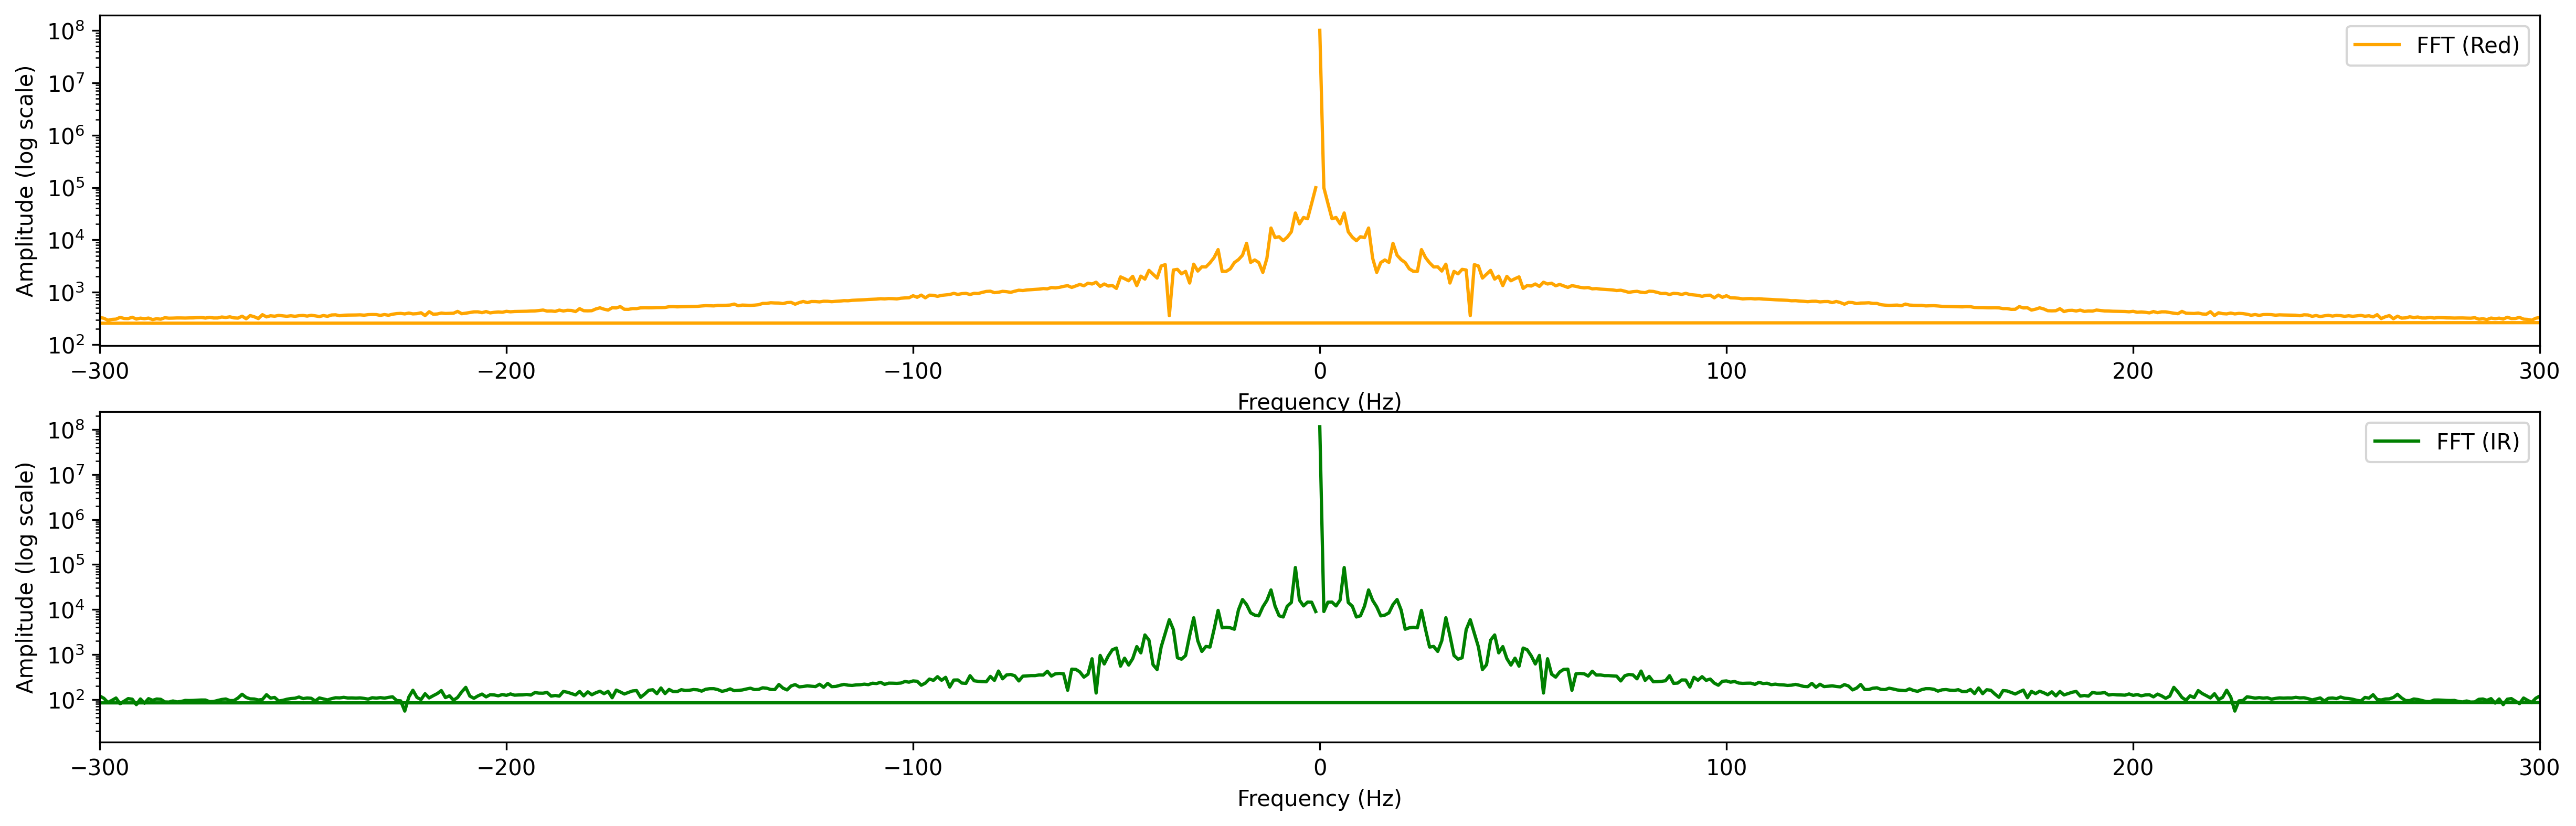

In [3]:
from scipy.signal import savgol_filter

# Smooth the data using Savitzky-Golay filter with a window size of 11 and polynomial order 2
smooth_data_red = savgol_filter(data[1], window_length=25, polyorder=2)
smooth_data_ir = savgol_filter(data[0], window_length=25, polyorder=2)

# Create figure
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# First subplot for smoothed RAW PPG (Red)
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(smooth_data_red, color='red', label="Smoothed PPG (Red)")
plt.legend()

# Second subplot for smoothed RAW PPG (IR)
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(smooth_data_ir, color='blue', label="Smoothed PPG (IR)")
plt.legend()

# Show the figure
plt.show()

# Compute FFT for both signals
fft_red = np.fft.fft(smooth_data_red)
fft_ir = np.fft.fft(smooth_data_ir)

# Compute the corresponding frequencies
N = len(smooth_data_red)  # Assuming both signals have the same length
frequencies = np.fft.fftfreq(N, d = (1/N))

# Create figure to show fft
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# Third subplot for FFT of Red signal
plt.subplot(2, 1, 1)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_red), color='orange', label="FFT (Red)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.yscale('log')
plt.legend()

# Fourth subplot for FFT of IR signal
plt.subplot(2, 1, 2)  # (number of rows, number of columns, subplot index)
plt.plot(frequencies, np.abs(fft_ir), color='green', label="FFT (IR)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.xlim(-raw_fft_x_limit, raw_fft_x_limit)
plt.legend()
plt.yscale('log')

plt.show()

## Find global high and low peaks and heart rate

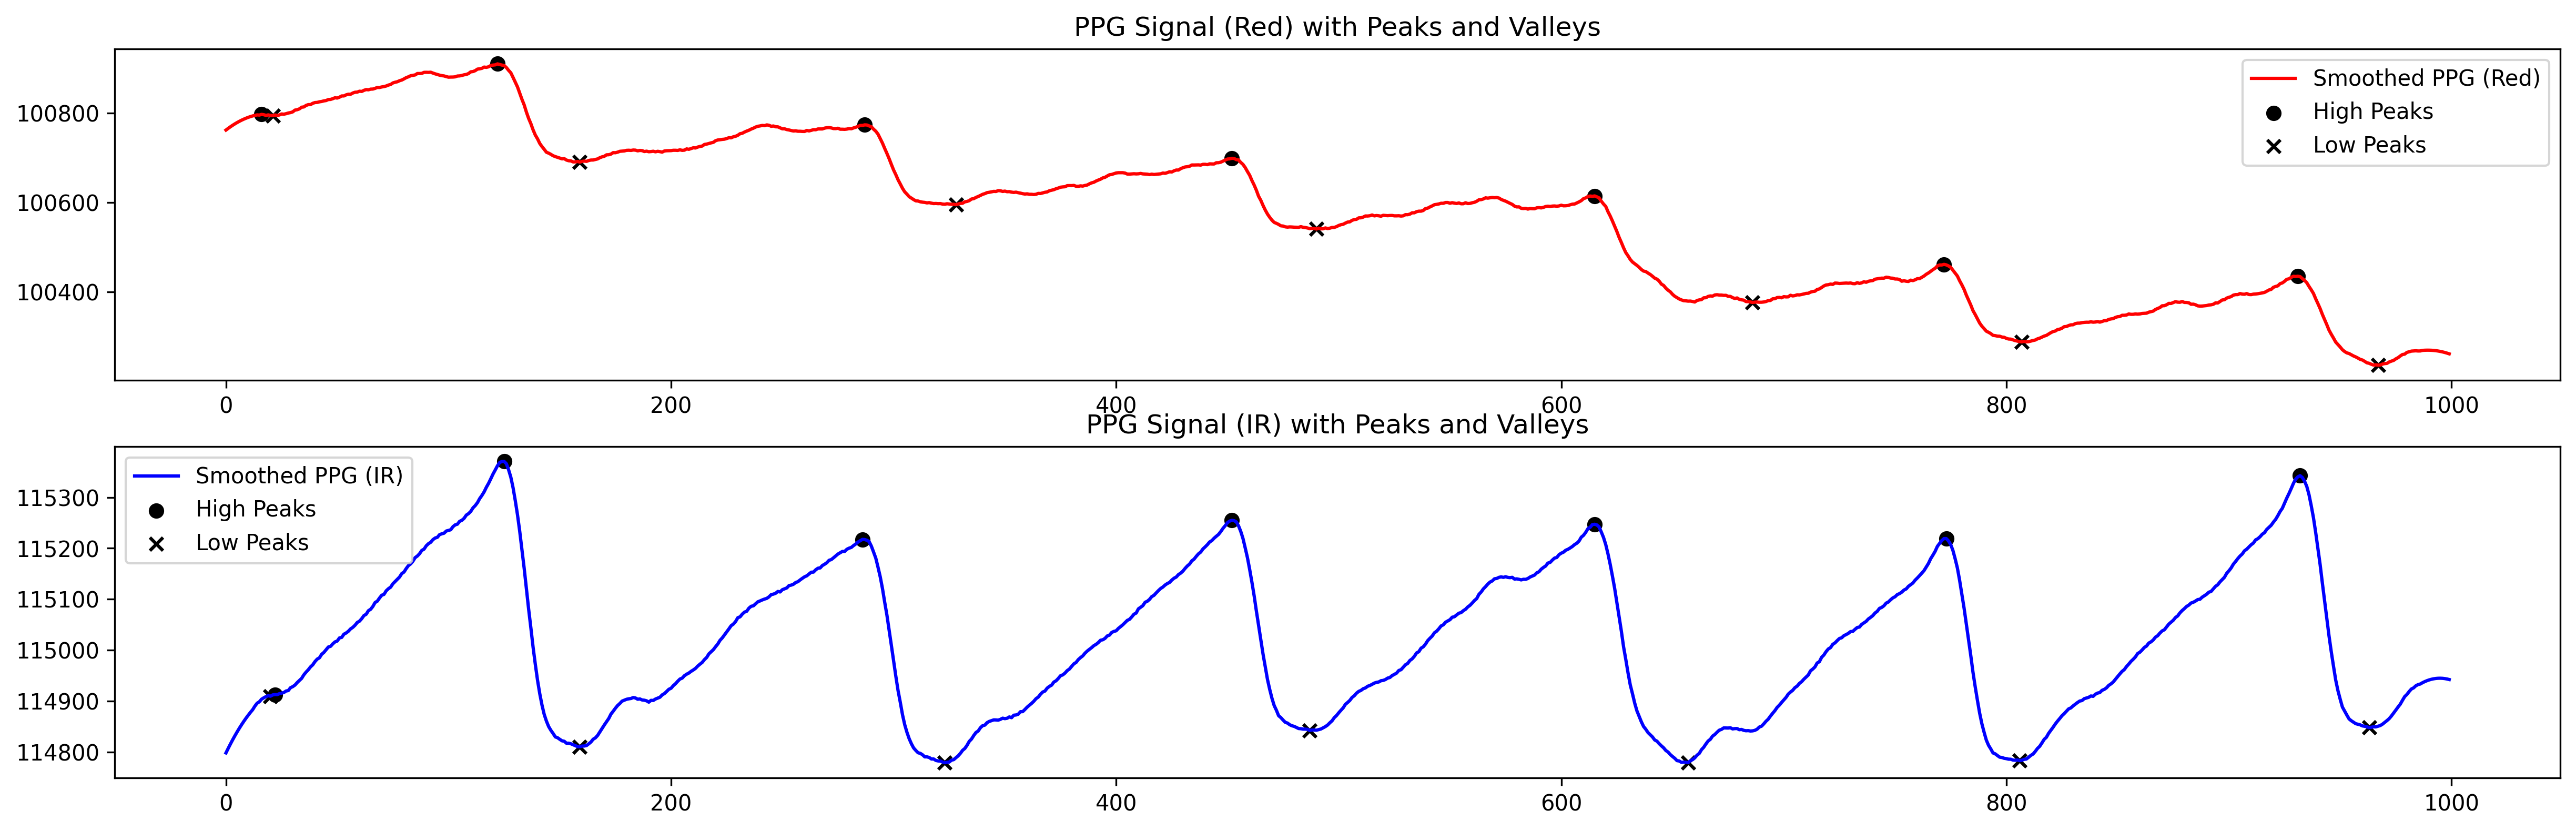

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

data_red = smooth_data_red
data_ir = smooth_data_ir

peaks_distance = 100

# Find high peaks (local maxima)
peaks_red, _ = find_peaks(data_red, distance=peaks_distance)  # Adjust 'distance' as per your signal
peaks_ir, _ = find_peaks(data_ir, distance=peaks_distance)

# Find low peaks (local minima) by inverting the signal
valleys_red, _ = find_peaks(-data_red, distance=peaks_distance)
valleys_ir, _ = find_peaks(-data_ir, distance=peaks_distance)

# Create figure
fig = plt.figure(figsize=(20, 6), dpi=300, facecolor='w', edgecolor='w')

# First subplot for Red PPG signal
plt.subplot(2, 1, 1)
plt.plot(data_red, color='red', label="Smoothed PPG (Red)")
plt.scatter(peaks_red, data_red[peaks_red], marker='o', color='black', label='High Peaks')  # Mark high peaks
plt.scatter(valleys_red, data_red[valleys_red], marker='x', color='black', label='Low Peaks')  # Mark low peaks
plt.legend()
plt.title("PPG Signal (Red) with Peaks and Valleys")

# Second subplot for IR PPG signal
plt.subplot(2, 1, 2)
plt.plot(data_ir, color='blue', label="Smoothed PPG (IR)")
plt.scatter(peaks_ir, data_ir[peaks_ir], marker='o', color='black', label='High Peaks')  # Mark high peaks
plt.scatter(valleys_ir, data_ir[valleys_ir], marker='x', color='black', label='Low Peaks')  # Mark low peaks
plt.legend()
plt.title("PPG Signal (IR) with Peaks and Valleys")

# Show the figure
plt.show()


## SpO2 Calculatiosn

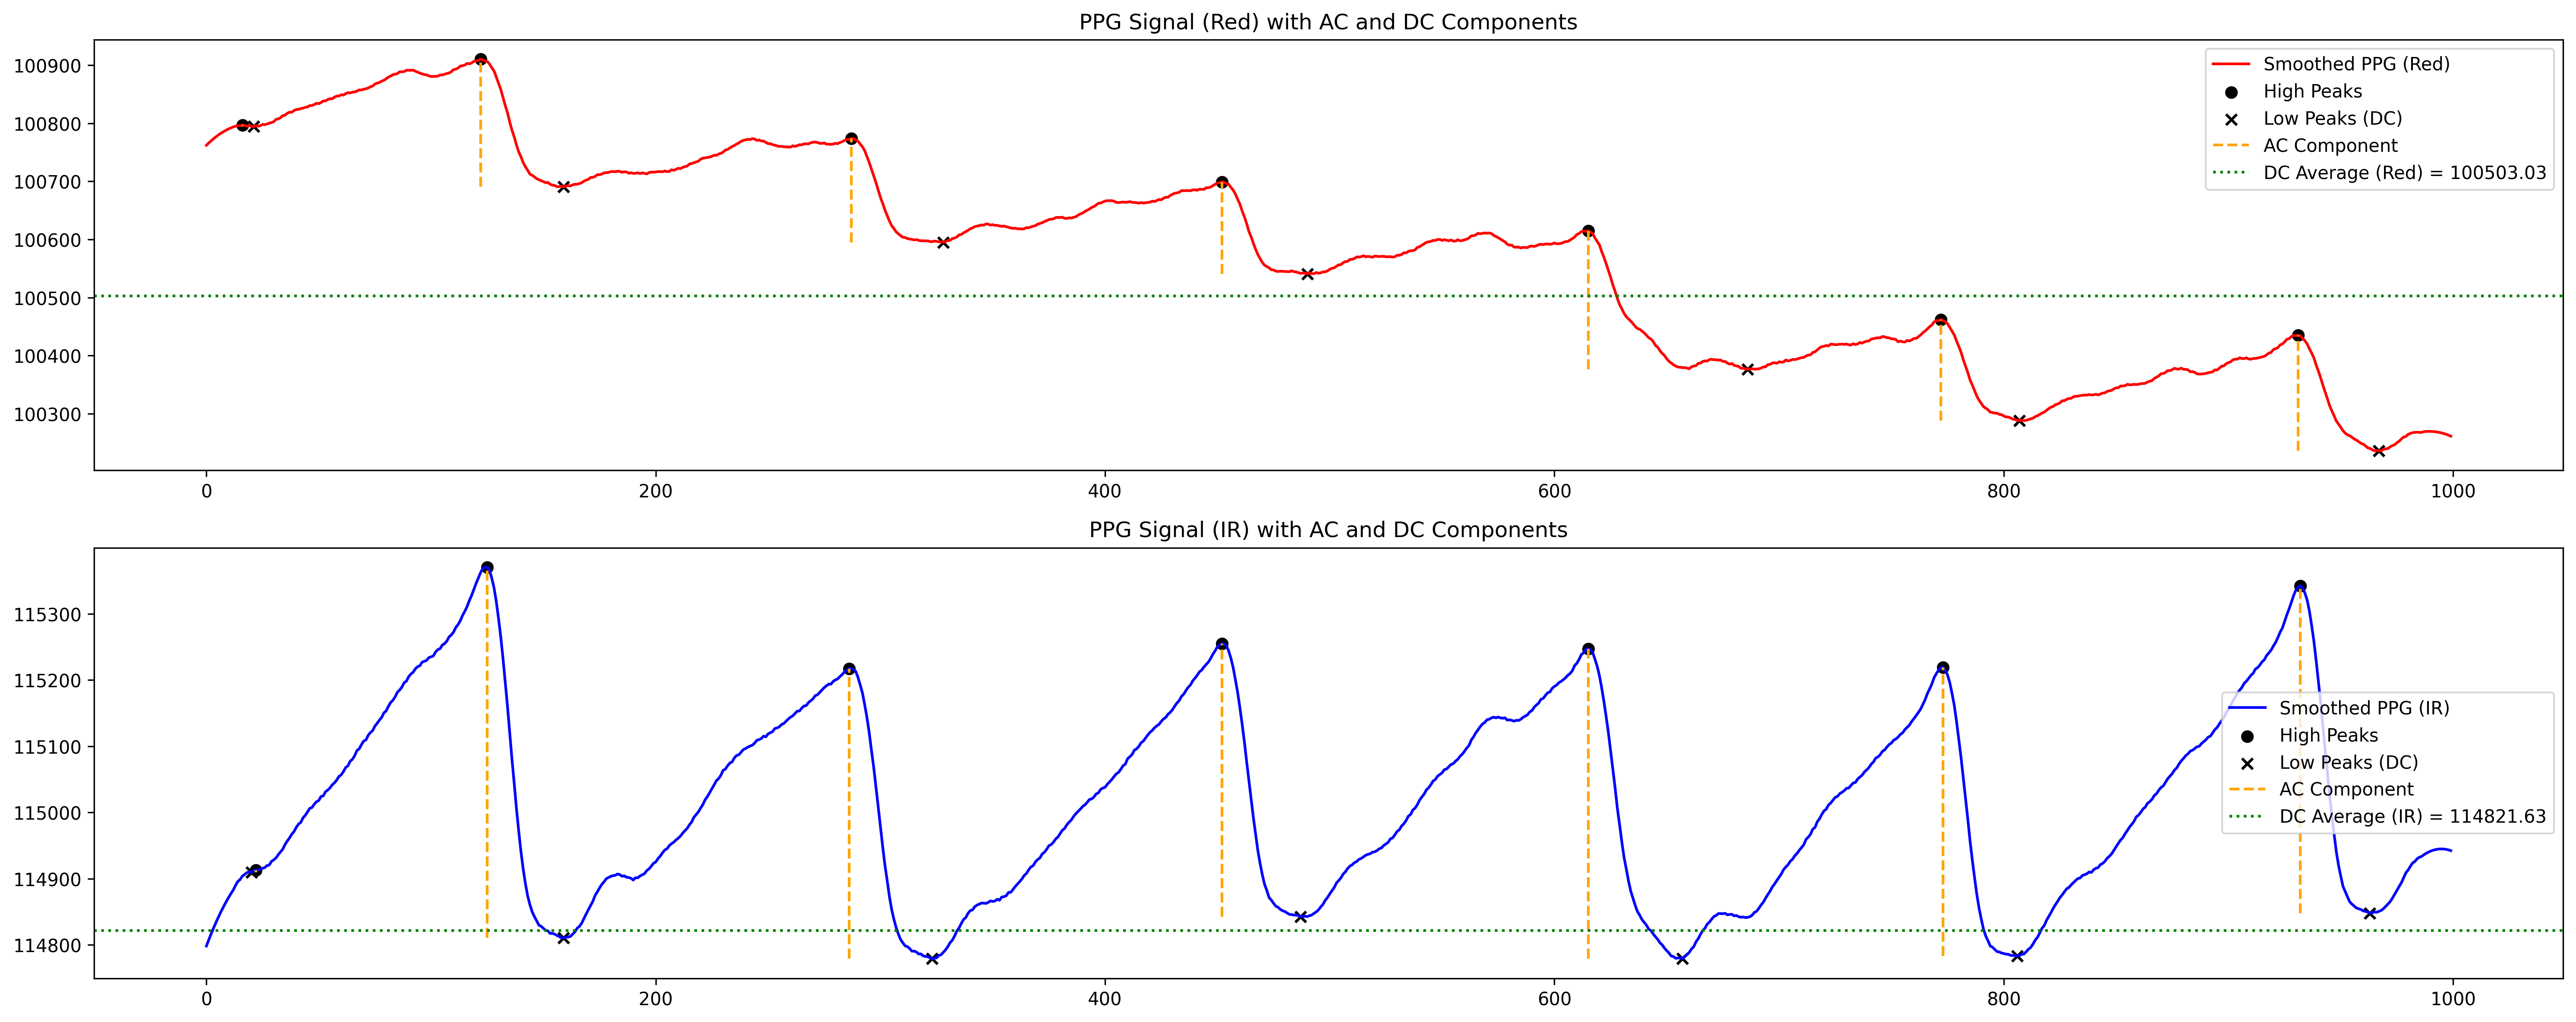

(Red PPG Signal) DC Average: 100503.03, AC Average: 167.16
(IR PPG Signal) DC Average: 114821.63, AC Average: 401.77
Red signal ratio (red_ac/red_dc): 0.0016632427536061973
IR signal ratio (ir_ac/ir_dc): 0.0034991158427942737
Ratio of Ratios (Red ratio/ IR ratio): 0.4753322920220866


In [5]:
# Calculate DC and AC components for Red PPG
dc_values_red = data_red[valleys_red]  # DC values are the valley points
ac_values_red = data_red[peaks_red] - data_red[valleys_red]  # AC values are the peak-valley differences
dc_avg_red = np.mean(dc_values_red)
ac_avg_red = np.mean(ac_values_red)

# Calculate DC and AC components for IR PPG
dc_values_ir = data_ir[valleys_ir]  # DC values are the valley points
ac_values_ir = data_ir[peaks_ir] - data_ir[valleys_ir]  # AC values are the peak-valley differences
dc_avg_ir = np.mean(dc_values_ir)
ac_avg_ir = np.mean(ac_values_ir)


# Create figure
plt.figure(figsize=(20, 8), dpi=300, facecolor='w', edgecolor='w')

# First subplot for Red PPG signal
plt.subplot(2, 1, 1)
plt.plot(data_red, color='red', label="Smoothed PPG (Red)")
plt.scatter(peaks_red, data_red[peaks_red], marker='o', color='black', label='High Peaks')  # Mark high peaks
plt.scatter(valleys_red, data_red[valleys_red], marker='x', color='black', label='Low Peaks (DC)')  # Mark low peaks (DC components)
plt.vlines(peaks_red, data_red[valleys_red], data_red[peaks_red], color='orange', linestyle='--', label='AC Component')  # AC Components as vertical lines
plt.axhline(y=dc_avg_red, color='green', linestyle=':', label=f'DC Average (Red) = {dc_avg_red:.2f}')
plt.legend()
plt.title("PPG Signal (Red) with AC and DC Components")

# Second subplot for IR PPG signal
plt.subplot(2, 1, 2)
plt.plot(data_ir, color='blue', label="Smoothed PPG (IR)")
plt.scatter(peaks_ir, data_ir[peaks_ir], marker='o', color='black', label='High Peaks')  # Mark high peaks
plt.scatter(valleys_ir, data_ir[valleys_ir], marker='x', color='black', label='Low Peaks (DC)')  # Mark low peaks (DC components)
plt.vlines(peaks_ir, data_ir[valleys_ir], data_ir[peaks_ir], color='orange', linestyle='--', label='AC Component')  # AC Components as vertical lines
plt.axhline(y=dc_avg_ir, color='green', linestyle=':', label=f'DC Average (IR) = {dc_avg_ir:.2f}')
plt.legend()
plt.title("PPG Signal (IR) with AC and DC Components")

# Show the figure
plt.tight_layout()
plt.show()

# Print calculated averages for AC and DC components
print(f"(Red PPG Signal) DC Average: {dc_avg_red:.2f}, AC Average: {ac_avg_red:.2f}")
print(f"(IR PPG Signal) DC Average: {dc_avg_ir:.2f}, AC Average: {ac_avg_ir:.2f}")

red_ratio = ac_avg_red/dc_avg_red
ir_ratio = ac_avg_ir/dc_avg_ir

print(f"Red signal ratio (red_ac/red_dc): {red_ratio}")
print(f"IR signal ratio (ir_ac/ir_dc): {ir_ratio}")


ratio_of_ratios = red_ratio/ir_ratio

print(f"Ratio of Ratios (Red ratio/ IR ratio): {ratio_of_ratios}")


## Map ROS to calibration curve

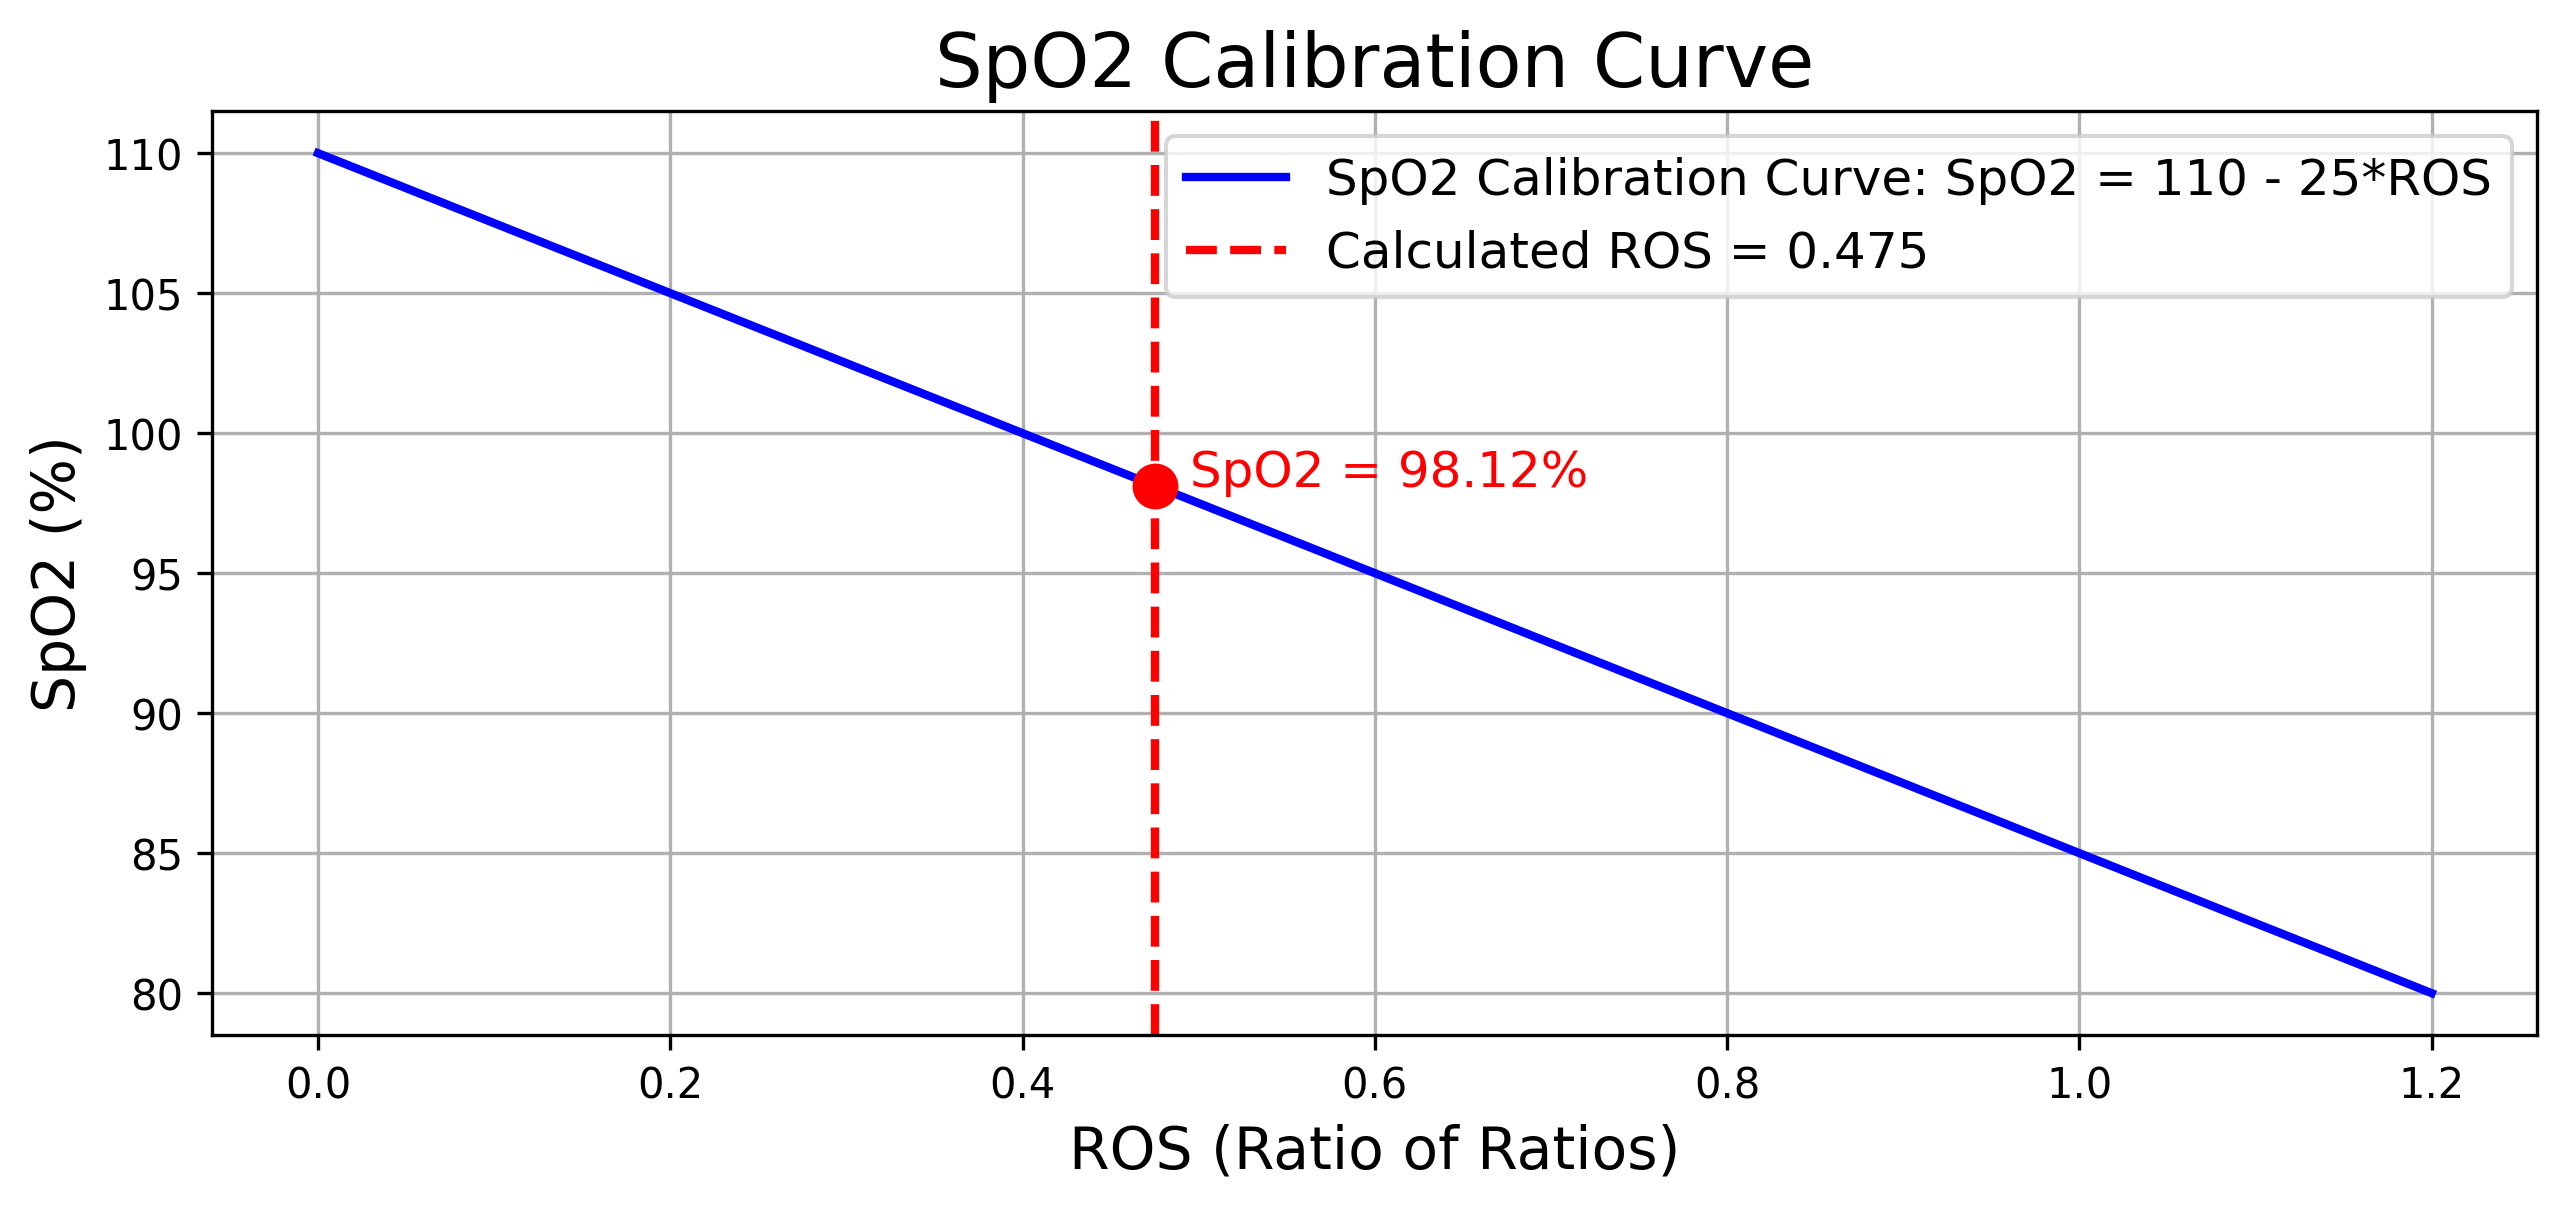

In [9]:
# Given ROS value
calculated_ros = ratio_of_ratios

# Calibration curve equation: SpO2 = 110 - 25 * ROS
# Generate a range of ROS values to plot the calibration curve
ros_values = np.linspace(0, 1.2, 200)  # Covers a range of typical ROS values
spo2_values = 110 - 25 * ros_values

# Create a plot for the calibration curve
plt.figure(figsize=(10, 4), dpi=300, facecolor='w', edgecolor='w')

# Plot the calibration curve
plt.plot(ros_values, spo2_values, color='blue', linewidth=2, label='SpO2 Calibration Curve: SpO2 = 110 - 25*ROS')

# Add a vertical line for the calculated ROS value
plt.axvline(x=calculated_ros, color='red', linestyle='--', linewidth=2, label=f'Calculated ROS = {calculated_ros:.3f}')

# Add a marker and annotation to highlight the corresponding SpO2 value
calculated_spo2 = 110 - 25 * calculated_ros
plt.scatter([calculated_ros], [calculated_spo2], color='red', s=100, zorder=5)  # Mark the calculated ROS on the curve
plt.text(calculated_ros + 0.02, calculated_spo2, f'SpO2 = {calculated_spo2:.2f}%', fontsize=12, color='red', ha='left')

# Labels and title
plt.xlabel('ROS (Ratio of Ratios)', fontsize=14)
plt.ylabel('SpO2 (%)', fontsize=14)
plt.title('SpO2 Calibration Curve', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()